In [1]:
import numpy as np
%matplotlib inline

## Defining the generic metrics class

In [2]:
class GeneralModelClass:
    # Where k∗ is the numbers of parameters you're estimating INCLUDING an intercept. 
    #(The residual vector will exist in an n−k∗ dimensional linear space.)

    # If you include an intercept term in a regression and k refers to the number of regressors
    # not including the intercept then k∗=k+1.
    #def __init__(self, target, sq_error, )
         
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = np.square(self.target - self.predict(self.data))# using target, predict and data, find the squared errors
        self.sq_error_ = np.sum(squared_errors)# find the Sum of squared errors
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ =  1- (self.sse()/self.sst())# using SST and SSE, find the R-squared value
        return self.r_sq_
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)
        return self.adj_r_sq_
    
    def rmse(self):
        '''returns calculated value of mse'''
        # using predict, data and target, find the RMSE error
        self.rmse_ = np.sqrt((np.sum(np.square(self.target-self.predict(self.data))))/len(self.data)) # your code
        return self.rmse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('rmse:', self.rmse()), ('r^2:', self.r_squared()), 
                  ('adj_r^2:', self.adj_r_squared()))
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))


## Defining the Linear Regression Class

In [3]:
# only makes sense for Linear Regression https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent
class LinearRegression_(GeneralModelClass):
    
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
          
        
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
         #degrees of freedom population dep. variable variance -- this is total amount of degrees
        self._dft = X.shape[0] - 1   
        # degrees of freedom for the residuals
        self._dfe = X.shape[0] - X.shape[1] - 1  # the more independent variables, the less adj_R-sq
        
        # training data & ground truth data
        self.data = X
        self.target = y
                
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept
        if self._fit_intercept:
            X = np.c_[X, np.ones((X.shape[0]))]
        
        # closed form solution. using normal equations to find the coeffiecents
        xTx = np.dot(np.transpose(X),X )# using X transposed and X matrices, find the data covariance matrix (X.T ?operator? X)
        inverse_xTx = np.linalg.inv(xTx) # find the inverse of the cov matrix, i.e. the precision matrix
        xTy = np.dot(np.transpose(X),y)# find X.transposed times y using ?what? operator
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0] # set the 0th coefficient as the intercept
            self.coef_ = coef[1:] # the remaining coefficients go here
        else:
            self.intercept_ = 0 # otherwise set intercept to be 0
            self.coef_ = coef
            
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array 
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)  # force 1D array into a column vector
        return self.intercept_+ np.dot(X,self.coef_) #using intercept, coefficients and X and linear regression formula, find the predictions
    
    def __str__(self):
        return "Results: b: {}, m: {}, Final Total error: {}".format(round(self.b, 2), round(self.m, 2), round(self.compute_error(), 2))

## The Problem : Housing Price Prediction

In [4]:
#!pip install numpy --upgrade --user # to make sure your numpy version is updated

### Loading the Dataset

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Understanding the Data using Metadata

In [6]:
#print(boston_dataset.DESCR)

In [7]:
boston.shape

(506, 14)

In [8]:
# find the sum of null values for each variable
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Visualizing  The Dependent Variable

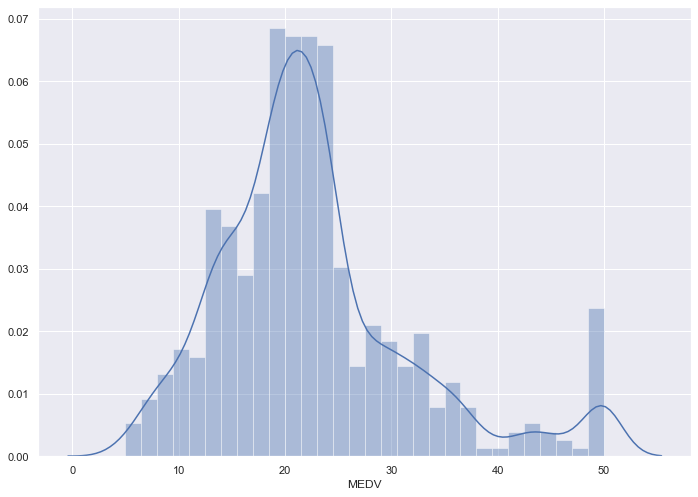

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
# visualize the distribution of the dependent variable (KDE + 30-bin histogram)
sns.distplot(boston['MEDV'],bins=30,)

### Visualizing Pairwise Relationships

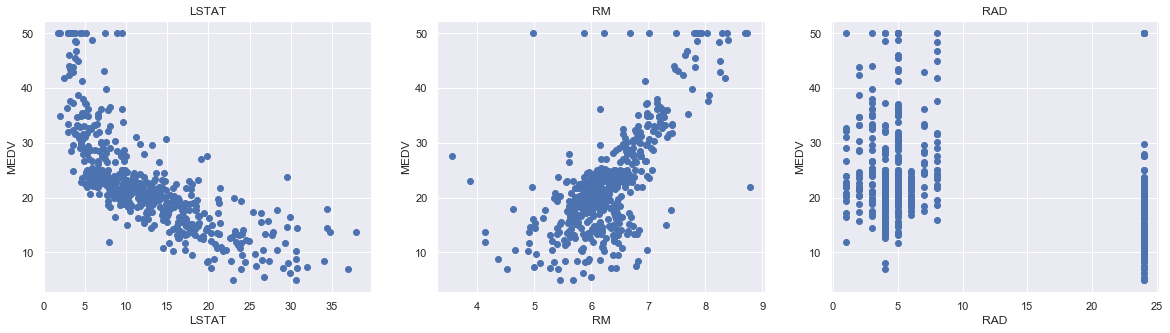

In [10]:
plt.figure(figsize=(20, 5))

# choose your own custom features here and make subplots to visualize pairwise relationships
# alternatively, you may use the pairplot
features = ['LSTAT', 'RM', 'RAD']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
x_vars = boston.columns.difference(['MEDV'])
y_vars = ['MEDV']
print(boston.columns)
print(x_vars)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')


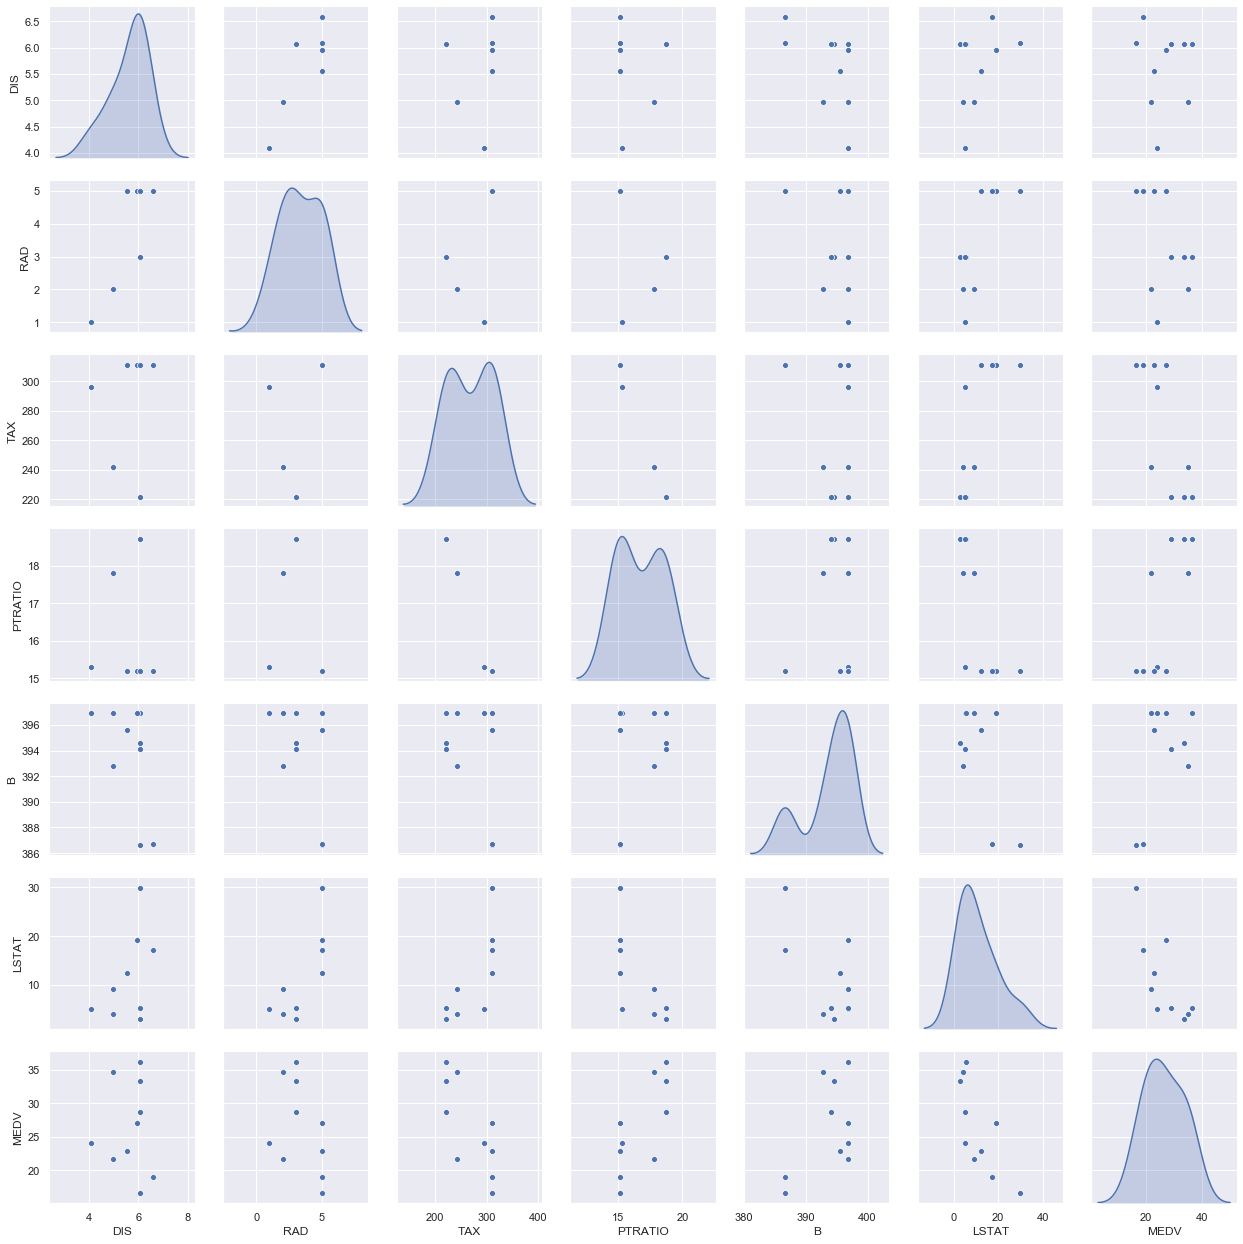

In [12]:
import seaborn as sns
#sns.pairplot(data=boston.iloc[0:10,:],x_vars=x_vars,y_vars=y_vars, hue = "RAD")
sns.pairplot(data=boston.iloc[0:10,:],vars = boston.columns[-7:],diag_kind="kde")
#sns.pairplot(data=boston.iloc[0:10,:]) runs very slowly

## Modeling

### Selecting Features Based on Correlation

In [13]:
import numpy as geek 
  
# string input 
a = geek.matrix([[1, 21, 30],  
                 [63 ,434, 3],  
                 [54, 54, 56]]) 
print(np.triu(a,k=1))
print(np.triu(a,k=-1))

[[ 0 21 30]
 [ 0  0  3]
 [ 0  0  0]]
[[  1  21  30]
 [ 63 434   3]
 [  0  54  56]]


In [14]:
df = pd.DataFrame({'a':[0,0,0,0], 'c':[1,2,3,4]})
print(df)
dd = (df.columns )
col = [col for col in df.columns if all(df[col]==0)]
print(col)

   a  c
0  0  1
1  0  2
2  0  3
3  0  4
['a']


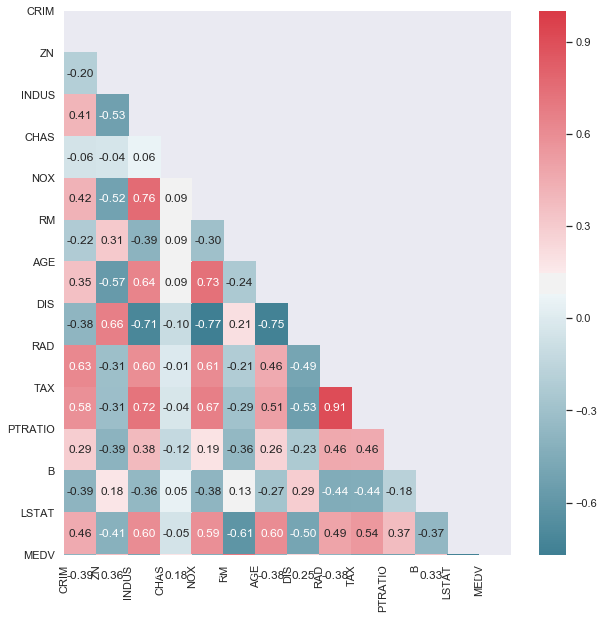

In [15]:
def doCorrelationReduction(corr_matrix = boston.corr(), original_data = boston, corr_thr=0.7):
    """Method to  select only the data with features that have low correlations between themselves"""
    
    corr_matrix_abs = corr_matrix.abs()
    upper = corr_matrix_abs.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # # Select upper triangle of correlation matrix
    # # Find index of feature columns with correlation greater than threshold
    to_drop = [col for col in upper.columns if any(upper[col]>0.7)]
    # [inside the list, using upper.columns, select any column (name) that has higher correlation than corr_thr value]
    low_cor_data = upper.columns.difference(to_drop)
    # using the difference operator on the original data dataframe columns, subtract the to_drop columns

    return original_data[low_cor_data]

def heatMap(df, mirror=False):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()
    
heatMap(df=boston)
boston_corr_reduced = doCorrelationReduction()

### Notice Any Dimensionality Reduction?

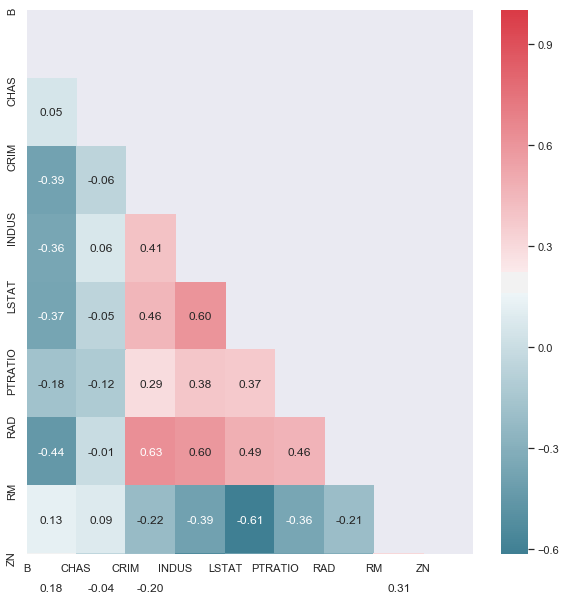

In [16]:
heatMap(df=boston_corr_reduced)

### Splitting Data for Measuring Generalization Error

In [17]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Linear Regression Using Your Own OOP Implementation

In [18]:
# importlib.reload(mymodule), # https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
general_model = GeneralModelClass()
linreg_model = LinearRegression_(general_model)
linreg_model.__dict__
linreg_model.fit(X=X_train,y=Y_train)
linreg_model.pretty_print_stats()
X_train.shape[0]

rmse:    63.9753
r^2:     -46.6456
adj_r^2: -46.8833


404

In [19]:
import inspect
lines = inspect.getsource(linreg_model.pretty_print_stats)
print(lines)

    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('rmse:', self.rmse()), ('r^2:', self.r_squared()), 
                  ('adj_r^2:', self.adj_r_squared()))
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))





**make sure if you add features that you transform both train and test when you transform your data**


### Linear Regression Using Statsmodels

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

In [20]:
import statsmodels.api as sm
X_constant_added = sm.add_constant(X)
model = sm.OLS(y, X_constant_added)
results_statsmodel = model.fit()
print(results_statsmodel.summary())
print('coefficient of determination:', results_statsmodel.rsquared)
print('adjusted coefficient of determination:', results_statsmodel.rsquared_adj)
print('regression coefficients:', results_statsmodel.params)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          7.01e-112
Time:                        22:41:41   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

C:\Users\35841\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Task : Multiple Regression Comparison with Different Libraries


In this task, your task is to predict the Median value of owner-occupied homes in $1000's in Boston, using multiple different features.

**Before you start : Split the Boston housing dataset into training and test sets using Scikit-learn train-test split function.**

- 0.0 Are the features linearly independent of each other? Show this programmatically.
- 0.1 Are the assumptions for linear regression fulfilled?

[assumptions](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)


In the next steps, we will look at some concrete models. **Remember to measure both the training and prediction times of your runs.**

0.0 Referring to the maximum likelihood notebook, implement a method to compute the negative log-likelihood.

- 1.0 Define **optimize (train)** a multiple linear regression model in Scikit-Learn with all features
- 1.1 Define **optimize (train)** a multiple linear regression model in Scikit-Learn with low correlated features

[Scikit Lin Reg](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**What fitting methods are available here?**


- 3.0 Define and **optimize (train)** a multiple linear regression model in statsmodels with all features
- 3.1  Define and **optimize (train)** a multiple linear regression model in statsmodels with low correlated features

[Statsmodels Lin Reg](https://www.statsmodels.org/stable/regression.html)

"This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors."

- Which library (statsmodels or Scikit-learn) allows for more flexible fitting procedure?


- 5. Remember that the training error is not a good metric for evaluation how well a model generalizes. That's why you should now compare the results by MSE achieved on the test set. 


- Which model generalizes the best? Plot the MSE VS neg-log-likelihood for each of the models. Why does the graph look like it does?
- Did you see any significant improvement in generalization by eliminating features that are highly correlated to others?
- Was there any considerable speed differences between the runtimes of the model? Did you use GPU or not?



### BONUS POINT QUESTIONS (+1.5 %):

----------------------------------------------------------
- 2.0 Define and **optimize (train)** a multiple **polynomial** regression model in Scikit-Learn with all features
- 2.1 Define and **optimize (train)** a multiple **polynomial** regression model in Scikit-Learn with low correlated features

OR

- Use Bayesian Feature Selection (refer to the appropriate method in SkLearn or Lasso to Select the best performing features).

---------------------------------------------------------------------
AND

- 4.0 Define and **optimize (train)** a multiple linear regression model in Pytorch with all features
- 4.1 Define and **optimize (train)** a multiple linear regression model in Pytorch with low correlated features


**What needs to be included** :

Answers to the previously mentioned questions, but now comparing all the trained models between each other:

- Which model generalizes the best?  Plot the MSE VS neg-log-likelihood for each of the models. Why does the graph look like it does?
- Did you see any significant improvement in generalization by eliminating features that are highly correlated to others?
- Was there any considerable speed differences between the runtimes of the model? Did you use GPU or not?

Before you start : Split the Boston housing dataset into training and test sets using Scikit-learn train-test split function.


In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(boston[boston.columns.difference(['MEDV'])], boston['MEDV'], test_size = 0.2, random_state=5)
boston.shape

(506, 14)

Are the features linearly independent of each other? Show this programmatically.


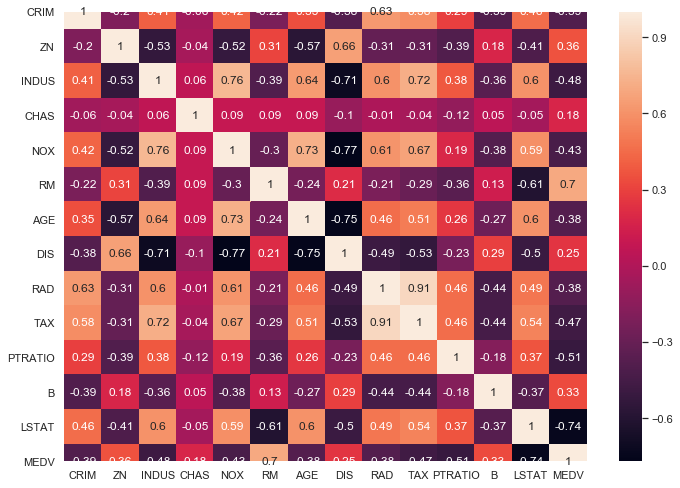

In [23]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

With some of the features there are high collinerity so all the features are not linnearly independent.
We can also check for multicollinearity and variance inflation factor

###### 0.1 Are the assumptions for linear regression fulfilled?

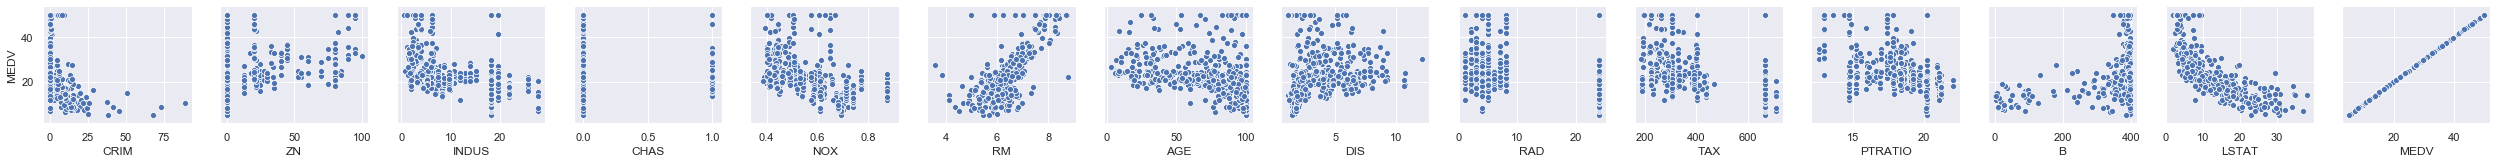

In [117]:
import seaborn as sns
#sns.pairplot(data=boston.iloc[0:10,:],x_vars=x_vars,y_vars=y_vars, hue = "RAD")
#checking all the x's plot against Y
sns.pairplot(data=boston, x_vars=boston.columns, y_vars=['MEDV'])
#sns.pairplot(data=boston.iloc[0:10,:])




In the next steps, we will look at some concrete models. Remember to measure both the training and prediction times of your runs.

- 0.0 Referring to the maximum likelihood notebook, implement a method to compute the negative log-likelihood.

- 1.0 Define optimize (train) a multiple linear regression model in Scikit-Learn with all features
- 1.1 Define optimize (train) a multiple linear regression model in Scikit-Learn with low correlated features


Define optimize (train) a multiple linear regression model in Scikit-Learn with all features

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [145]:
## Training the model 
%time
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, Y_train)

Wall time: 0 ns


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [123]:
regressor.coef_

array([ 1.11887670e-03,  1.17492092e-02,  2.70536624e+00, -1.30799852e-01,
       -1.49308124e+00,  1.09535045e-03, -5.94076089e-01, -1.59570504e+01,
       -9.52369666e-01,  3.64422378e-01,  3.41397332e+00, -1.31718155e-02,
        4.94030235e-02])

In [27]:
## showing the coefficent of each variable
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
AGE,0.001119
B,0.011749
CHAS,2.705366
CRIM,-0.130800
DIS,-1.493081
INDUS,0.001095
LSTAT,-0.594076
NOX,-15.957050
PTRATIO,-0.952370
RAD,0.364422


In [146]:
## Now predicting on test data 
%time
y_pred = regressor.predict(X_test)

Wall time: 0 ns


In [147]:
df_prediction = pd.DataFrame({'Real': Y_test, 'Predicted': y_pred})
df_prediction.head(25)
df_prediction.shape

(102, 2)

In [148]:
## calculating some performance metric of model 
 
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred)) 
print('R² error:', r2_score(Y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Squared Error: 20.86929218377094
R² error: 0.733449214745306
Root Mean Squared Error: 4.568292042303222


Another assumption is to check whether the residuals follow the normal distribution which can be demonstrated via QQ plot

(102,)


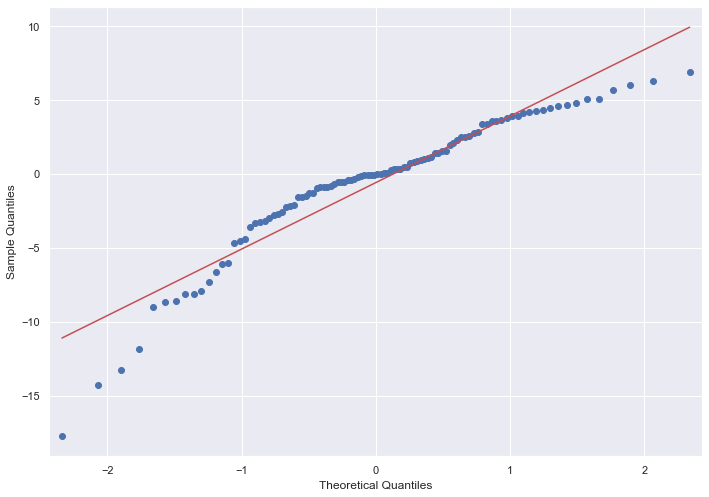

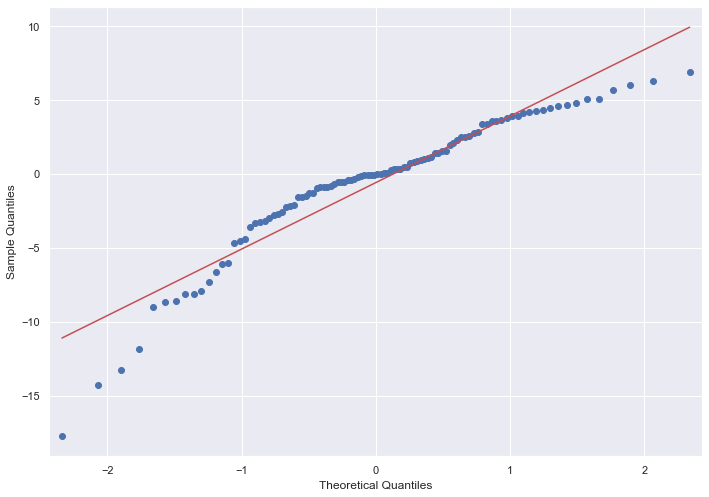

In [139]:
residuals=((y_pred-Y_test))
##print(residuals.head(5))
print(residuals.shape)
sm.qqplot(residuals,loc=0,scale=1,line="r")



## The qqplot here quite lie on the line but not sure if we should consider the residuals are normally distributed

(array([ 1.,  2.,  1.,  6.,  4.,  8., 20., 31., 19., 10.]),
 array([-17.70715975, -15.2462189 , -12.78527804, -10.32433719,
         -7.86339634,  -5.40245549,  -2.94151463,  -0.48057378,
          1.98036707,   4.44130792,   6.90224878]),
 <a list of 10 Patch objects>)

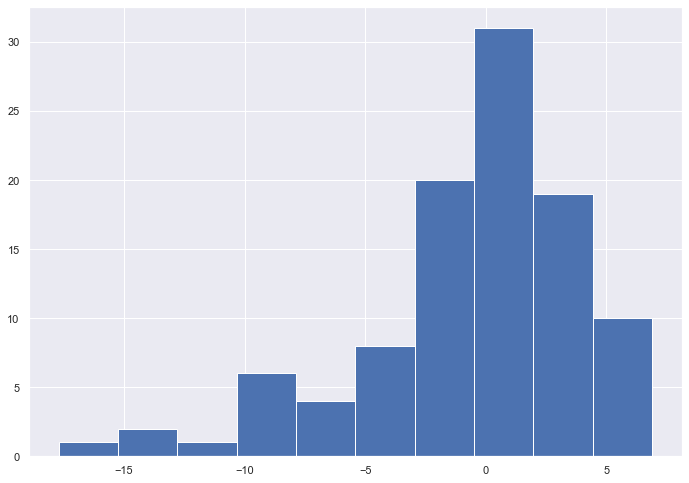

In [142]:
#plotting the histogram of residuals
plt.hist(residuals)

#### 3.0 Define and optimize (train) a multiple linear regression model in statsmodels with all features


In [31]:
#X_train, X_test, Y_train, Y_test
import statsmodels.api as sm
X=boston[boston.columns.difference(['MEDV'])]
print(X.head(5))
y=boston['MEDV']
X_constant_added = sm.add_constant(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_constant_added,y, test_size = 0.2, random_state=5)
model = sm.OLS(Y_train, X_train)
results_statsmodel = model.fit()
#print(results_statsmodel.summary())
print('coefficient of determination:', results_statsmodel.rsquared)
print('adjusted coefficient of determination:', results_statsmodel.rsquared_adj)
print('regression coefficients:', results_statsmodel.params)


prediction=results_statsmodel.predict(X_test)
len(prediction)
prediction[0:10]



    AGE       B  CHAS     CRIM     DIS  INDUS  LSTAT    NOX  PTRATIO  RAD  \
0  65.2  396.90   0.0  0.00632  4.0900   2.31   4.98  0.538     15.3  1.0   
1  78.9  396.90   0.0  0.02731  4.9671   7.07   9.14  0.469     17.8  2.0   
2  61.1  392.83   0.0  0.02729  4.9671   7.07   4.03  0.469     17.8  2.0   
3  45.8  394.63   0.0  0.03237  6.0622   2.18   2.94  0.458     18.7  3.0   
4  54.2  396.90   0.0  0.06905  6.0622   2.18   5.33  0.458     18.7  3.0   

      RM    TAX    ZN  
0  6.575  296.0  18.0  
1  6.421  242.0   0.0  
2  7.185  242.0   0.0  
3  6.998  222.0   0.0  
4  7.147  222.0   0.0  
coefficient of determination: 0.738339392059052
adjusted coefficient of determination: 0.7296173717943537
regression coefficients: const      37.912487
AGE         0.001119
B           0.011749
CHAS        2.705366
CRIM       -0.130800
DIS        -1.493081
INDUS       0.001095
LSTAT      -0.594076
NOX       -15.957050
PTRATIO    -0.952370
RAD         0.364422
RM          3.413973
TAX       

C:\Users\35841\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


226    37.563118
292    32.144451
90     27.065736
373     5.670806
273    35.099826
417     5.858037
503    27.537085
234    31.810192
111    26.356348
472    22.772087
dtype: float64

#### 3.1 Define and optimize (train) a multiple linear regression model in statsmodels with low correlated features

In [32]:

print(boston_corr_reduced.head(5))
rm_constadded = sm.add_constant(boston_corr_reduced)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(rm_constadded,y, test_size = 0.2, random_state=5)
model1 = sm.OLS(Y_train1, X_train1)
results_statsmodel1 = model1.fit()

prediction1=results_statsmodel1.predict(X_test1)
len(prediction1)
prediction[0:10]

print('coefficient of determination:', results_statsmodel1.rsquared)
print('adjusted coefficient of determination:', results_statsmodel1.rsquared_adj)
print('regression coefficients:', results_statsmodel1.params)


## predicted response
##print('predicted response:', results.fittedvalues, sep='\n')
##print('predicted response:', results.predict(x), sep='\n')


        B  CHAS     CRIM  INDUS  LSTAT  PTRATIO  RAD     RM    ZN
0  396.90   0.0  0.00632   2.31   4.98     15.3  1.0  6.575  18.0
1  396.90   0.0  0.02731   7.07   9.14     17.8  2.0  6.421   0.0
2  392.83   0.0  0.02729   7.07   4.03     17.8  2.0  7.185   0.0
3  394.63   0.0  0.03237   2.18   2.94     18.7  3.0  6.998   0.0
4  396.90   0.0  0.06905   2.18   5.33     18.7  3.0  7.147   0.0
coefficient of determination: 0.7004375242591044
adjusted coefficient of determination: 0.6935947265898962
regression coefficients: const      17.955377
B           0.012756
CHAS        3.169764
CRIM       -0.102072
INDUS      -0.029436
LSTAT      -0.599568
PTRATIO    -1.011086
RAD         0.152379
RM          4.020074
ZN         -0.003771
dtype: float64


In [149]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(boston_corr_reduced,y, test_size = 0.2, random_state=5)
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train1, Y_train1)
y_pred1 = regressor.predict(X_test1)
df_prediction = pd.DataFrame({'Real': Y_test1, 'Predicted': y_pred1})
#df_prediction.head(25)
#df_prediction.shape
print('Mean Squared Error:', mean_squared_error(Y_test1, y_pred1)) 
print('R² error:', r2_score(Y_test1, y_pred1)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test1, y_pred1)))


Mean Squared Error: 25.113488726746553
R² error: 0.6792406718132575
Root Mean Squared Error: 5.011336022134871


In [ ]:
## Comparison of Predictions
y_pred_own = linreg_model.predict(X=X_test)
y_pred_sklearn = linreg_model_sklearn.predict(x=X_test)


### Referring to the maximum likelihood notebook, implement a method to compute the negative log-likelihood.

In [94]:
from scipy.optimize import minimize
import scipy.stats as stats
#import pymc3 as pm3
#import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel


def neg_log_likelihood(params):
    """ Computes the """
    #intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = np.dot(my_x,params[:-1]) 
    #print(yhat)
    # predictions
    # to find the negative log likelihood, sum the log densities as according to the likelihood function formula
    negative_log_likelihood = -np.sum( stats.norm.logpdf(Y_train1, loc=yhat,scale=params[-1] ))
    return(negative_log_likelihood)


X_train1, X_test1, Y_train1, Y_test1 = train_test_split(boston_corr_reduced,y, test_size = 0.2, random_state=5)
X_constadded = sm.add_constant(X_train1)
my_x=X_constadded.iloc[:,0:4]
scale=1
my_y=Y_train1
##first 1 value in beta is intercept and last 1 value is the standard deviation
beta=np.array([1,1,1,1,1])

params=beta




scale=0.5
# let's start with some random coefficient guesses and optimize
#guess = np.array([5,5,2])
results = minimize(neg_log_likelihood,beta, method = 'Nelder-Mead',options={'disp': True})
#print(results)

# drop results into df and round to match statsmodels
resultsdf = pd.DataFrame({'coef':results['x']})
#resultsdf.index=['constant','x','sigma']
print(resultsdf)



       coef
0 -0.473394
1  0.063112
2  2.586099
3 -0.147441
4  8.981557


### Linear Independence / Dependence
[stats stackexchange reference](https://stats.stackexchange.com/questions/92522/linearly-dependent-features)


In [ ]:
from numpy.linalg import matrix_rank
if matrix_rank(boston.values) == len(boston.columns):
    print("You have a full-rank data matrix, no linearly dependent features!")
else :
    print("Some features are linearly dependent!")


In [ ]:
a = [1,2,3]
b = [4,5,6]
np.square(np.array(a)-np.array(b))

In [ ]:
class parents:
    def somethin(self):
        print('I am from parents class')
        
class child(parents):
    def anything(self):
        print('I am from child class')
        
test = child()
test.somethin()

test_one = parents()
test_one.anything()

In [ ]:
boston.shape
